#Problem1

## Part a


In [ ]:
#import library
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.svm import SVC
import pandas as pd
from sklearn import datasets

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data = iris.data
feature_names = iris.feature_names

# Convert to pandas DataFrame
df_data = pd.DataFrame(data, columns=feature_names)
df_data['target'] = iris.target

# Compute statistics
statistics = df_data.describe()

# Print results
print("Summary statistics:")
print(statistics)

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
df_data.shape

(150, 5)

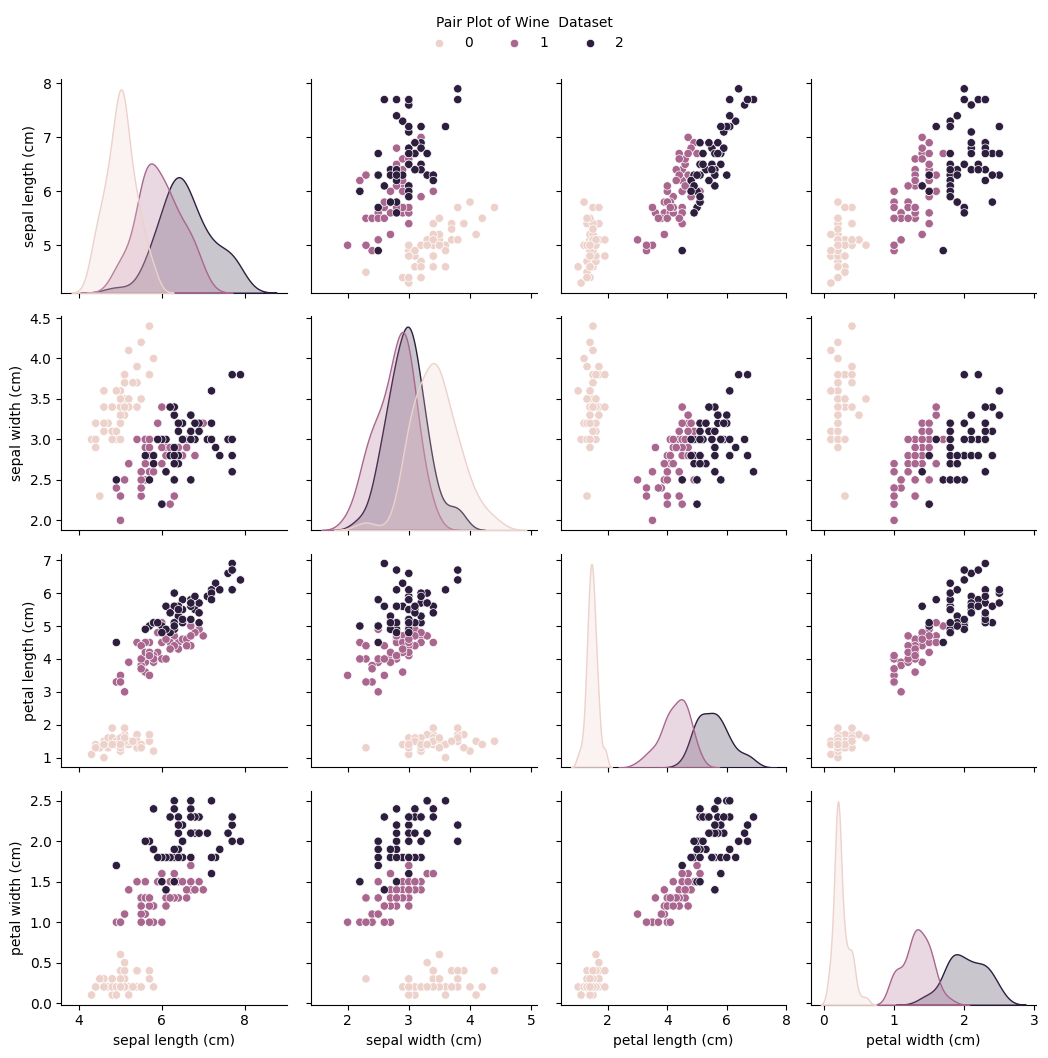

In [ ]:
import seaborn as sns

ax = sns.pairplot(df_data, hue='target')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Pair Plot of Wine  Dataset", frameon=False)

plt.tight_layout()
plt.show()

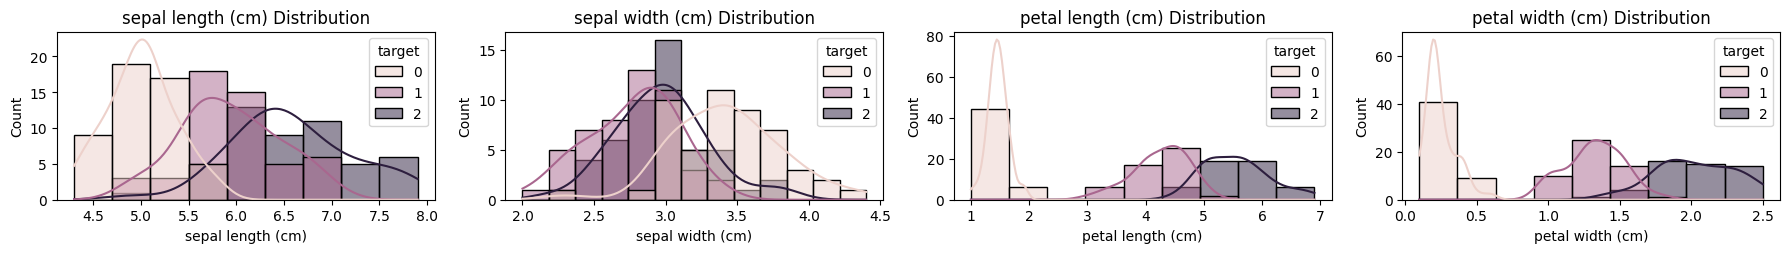

In [ ]:
column_names = df_data.columns
column_names = column_names.to_list()

plt.figure(figsize=(18, 9))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df_data, x=feature, hue='target', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

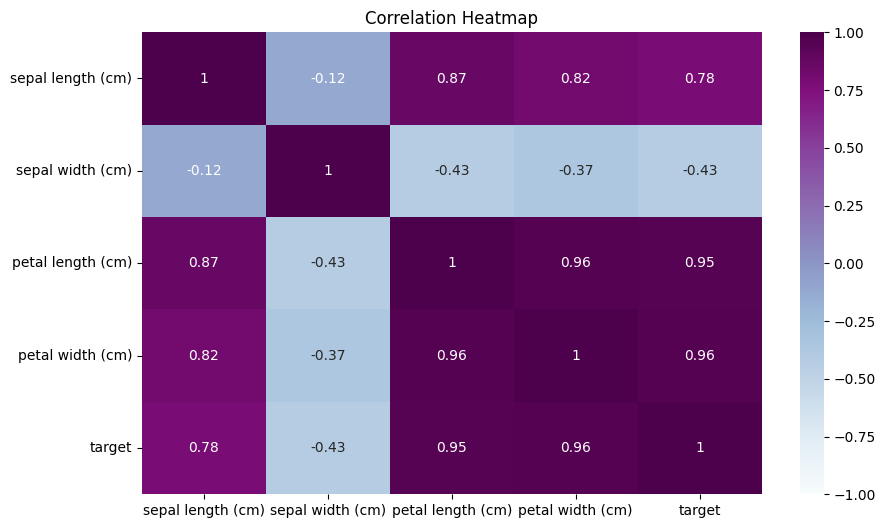

In [ ]:
corr = df_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

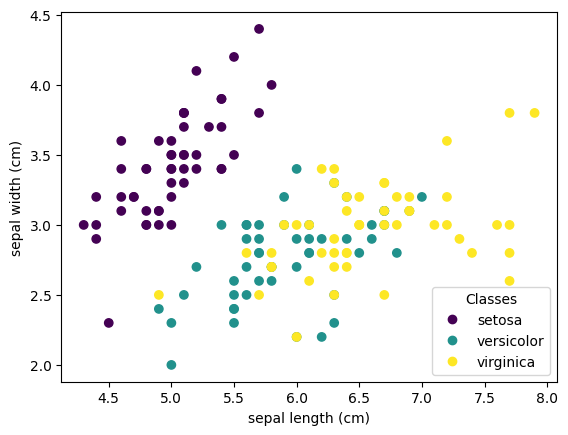

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.manifold import TSNE

In [ ]:
X = iris.data
y = iris.target

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

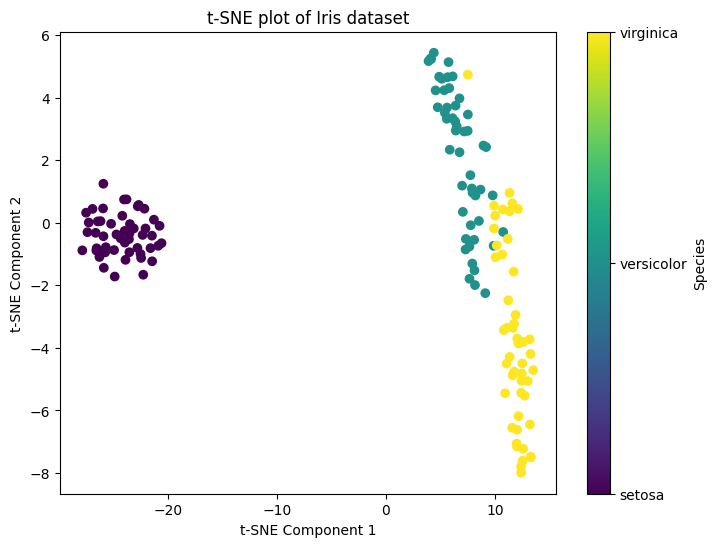

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE plot of Iris dataset')
plt.colorbar(label='Species', ticks=range(3), format=plt.FuncFormatter(lambda val, loc: iris.target_names[val]))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Part b


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


clf = SVC(kernel='linear')
clf.fit(X_pca, y)




SVC(kernel='linear')

In [ ]:
clf.support_vectors_

array([[-2.35575405, -0.03728186],
       [ 1.46430232,  0.50426282],
       [ 1.08810326,  0.07459068],
       [ 0.98493451, -0.12481785],
       [ 0.94473373, -0.54314555],
       [ 1.11628318, -0.08461685],
       [ 1.29818388, -0.32778731],
       [ 0.92172892, -0.18273779],
       [ 1.33202444,  0.24444088],
       [ 1.55780216,  0.26749545],
       [ 1.38002644, -0.42095429],
       [ 1.22069088,  0.40761959],
       [ 0.81509524, -0.37203706],
       [ 0.46480029, -0.67071154],
       [-0.90646986, -0.75609337],
       [ 0.52123224, -1.19275873],
       [ 1.66177415,  0.24222841],
       [ 1.19900111, -0.60609153],
       [ 1.38876613, -0.20439933],
       [ 1.25850816, -0.17970479],
       [ 1.29113206, -0.11666865],
       [ 1.44416124, -0.14341341],
       [ 1.16932634, -0.16499026],
       [ 1.9222678 ,  0.40920347],
       [ 1.52716661, -0.37531698],
       [ 1.76434572,  0.07885885],
       [ 1.39018886, -0.28266094]])

In [ ]:
clf.n_support_


array([ 1, 14, 12], dtype=int32)

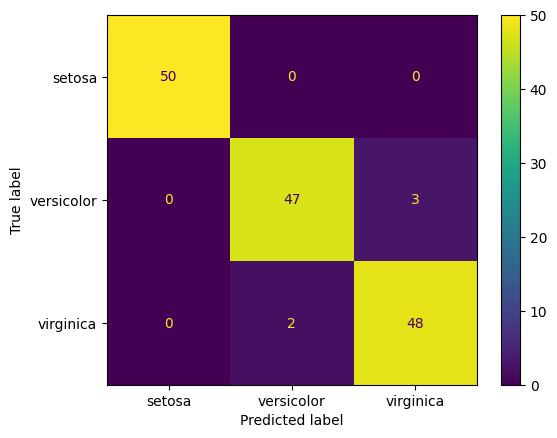

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = clf.predict(X_pca)

# Generate and display the confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()

# Display the plot
plt.show()

ValueError: cannot reshape array of size 2700 into shape (30,30)

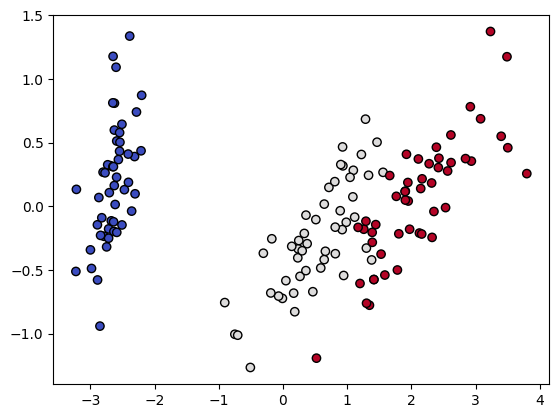

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()




In [ ]:
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = plt.cm.viridis
    cmap_bold = plt.cm.Dark2


    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    print(f'Accuracy: {accuracy:.2f}')


    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


Accuracy: 0.97


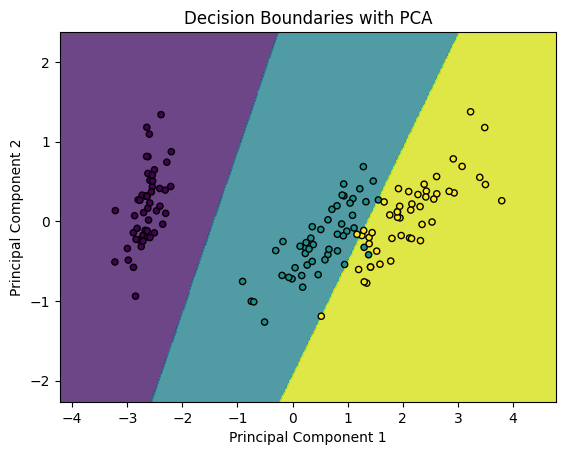

In [ ]:
# Plot decision boundaries with PCA
plot_decision_boundary(X_pca, y, clf, 'Decision Boundaries with PCA')


In [ ]:
import numpy as np
import itertools


# Get all combinations of 2 columns out of 4
combinations = list(itertools.combinations(range(X.shape[1]), 2))

# Generate the 6 unique arrays
arrays = [X[:, combination] for combination in combinations]

# Example of accessing individual arrays
# X_12 = arrays[0]
# X_13 = arrays[1]
# X_14 = arrays[2]
# X_23 = arrays[3]
# X_24 = arrays[4]
# X_34 = arrays[5]

In [ ]:
combinations

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

Accuracy: 0.82


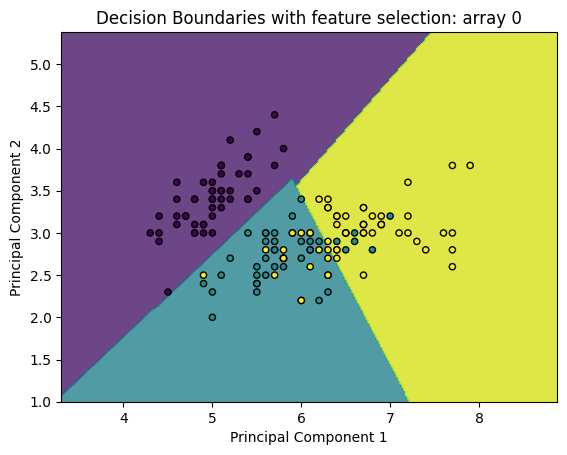


Accuracy: 0.95


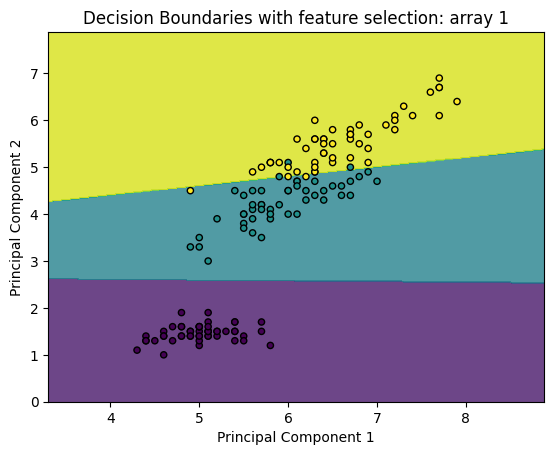


Accuracy: 0.96


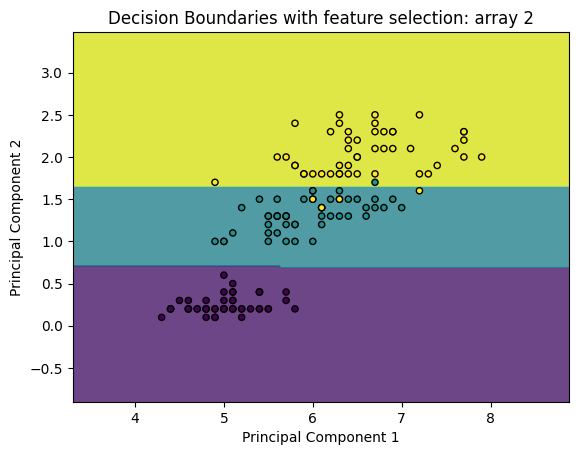


Accuracy: 0.96


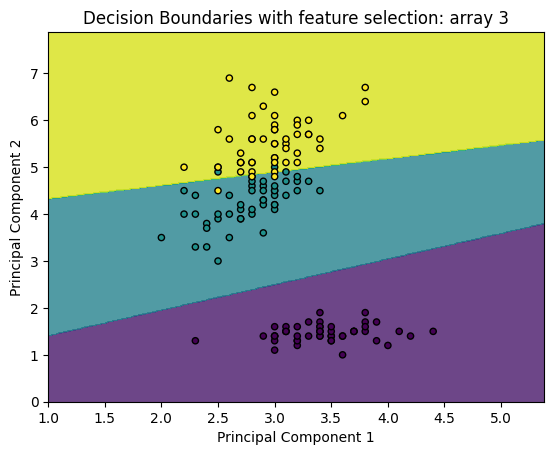


Accuracy: 0.96


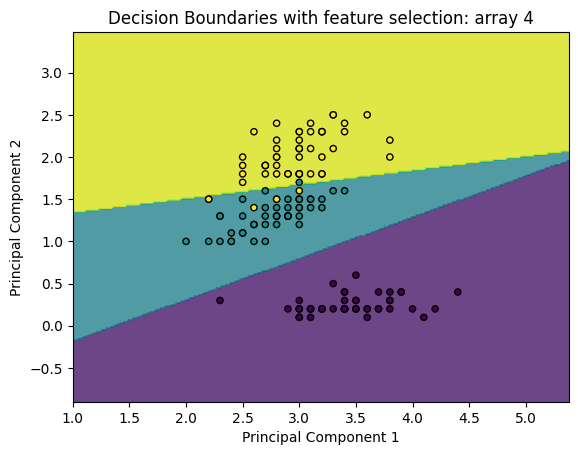


Accuracy: 0.97


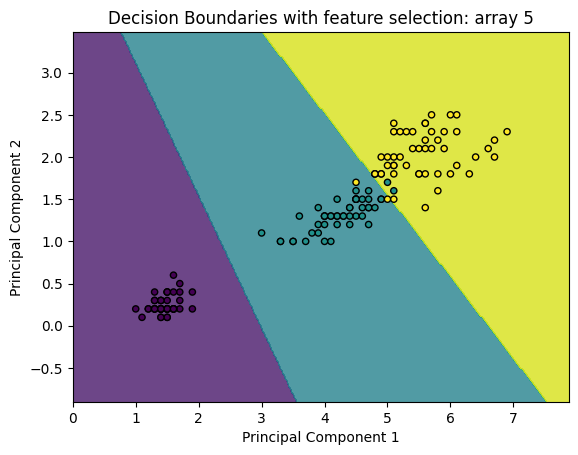

In [ ]:
for i in range(6):
  clf = SVC(kernel='linear')
  clf.fit(arrays[i], y)
  plot_decision_boundary(arrays[i], y, clf, f'Decision Boundaries with feature selection: array {i}')
  print("=============================================================================")
  print()


## Part c


Accuracy: 0.97


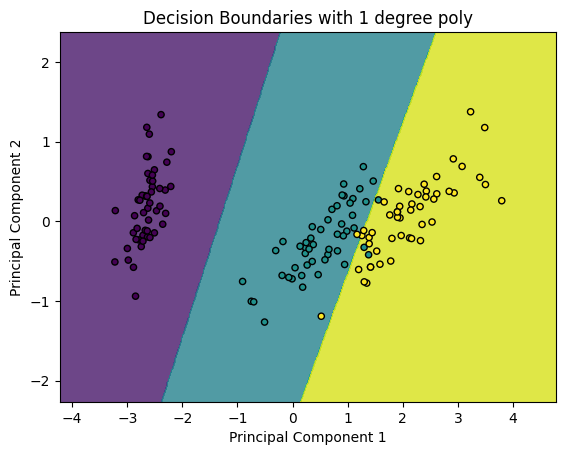


Accuracy: 0.87


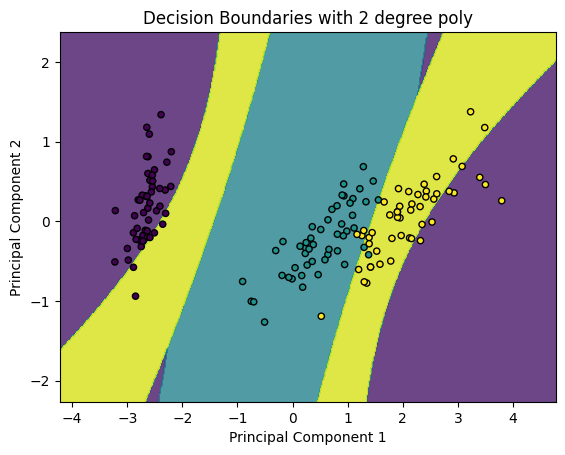


Accuracy: 0.95


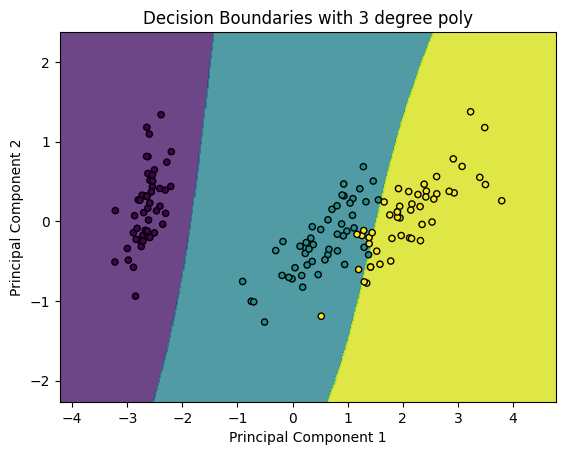


Accuracy: 0.83


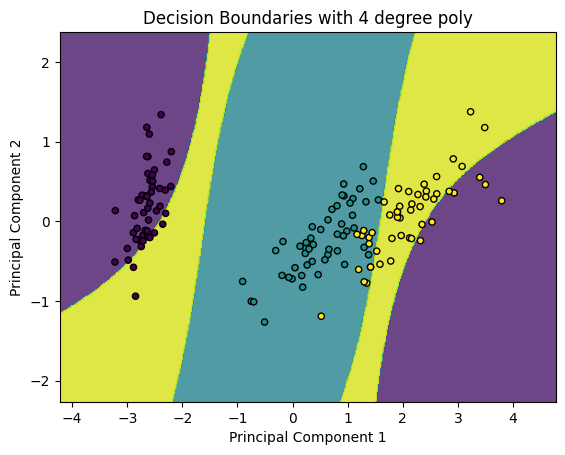


Accuracy: 0.91


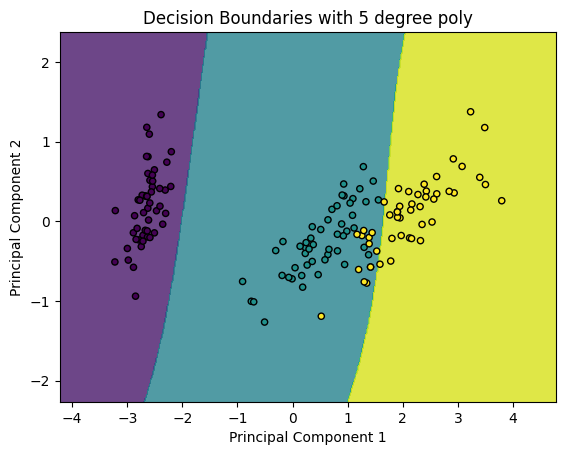


Accuracy: 0.77


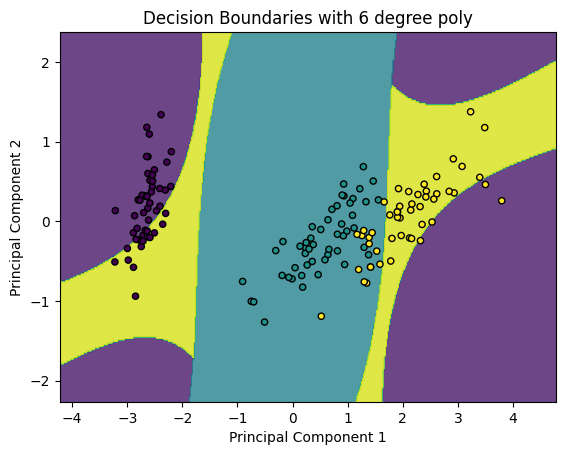


Accuracy: 0.90


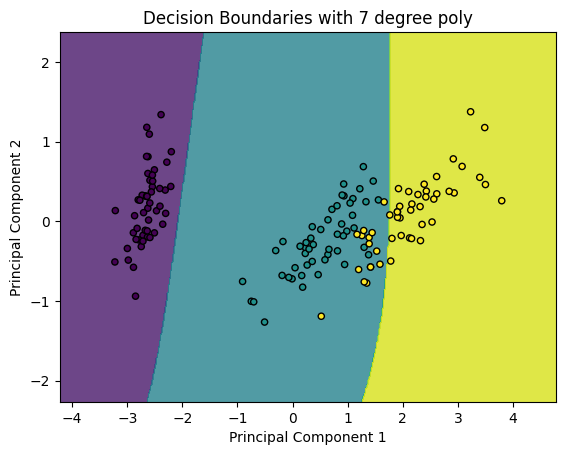


Accuracy: 0.77


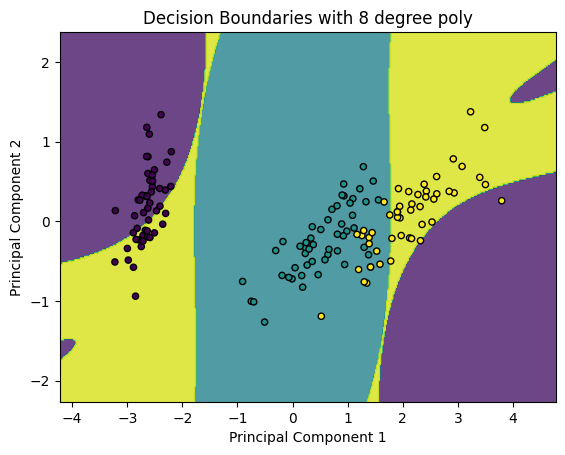


Accuracy: 0.88


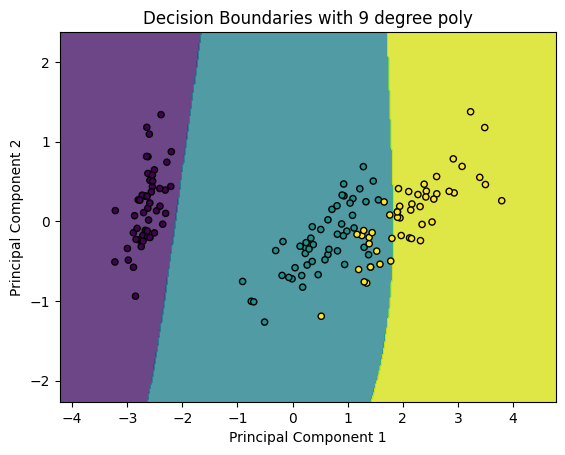


Accuracy: 0.74


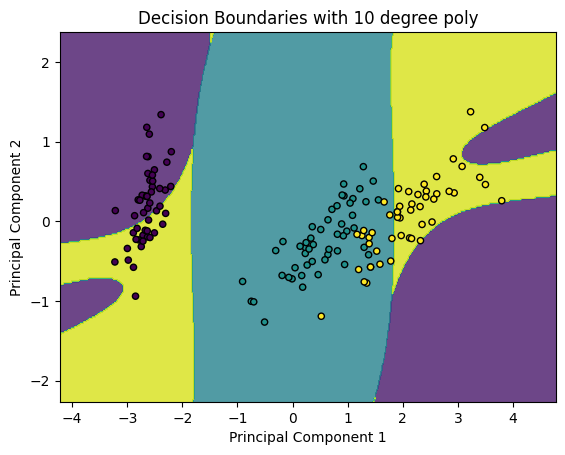

In [ ]:
def plot_decision_boundaries_subplots(X, y):
    degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    models = [SVC(kernel='poly', degree=degree, C=1.0) for degree in degrees]

    for model, degree in zip(models, degrees):
      model.fit(X_pca, y)
      y_pred = model.predict(X_pca)
      accuracy = accuracy_score(y, y_pred)

      plot_decision_boundary(X_pca, y, model, f'Decision Boundaries with {degree} degree poly')
      print("===========================================================")
      print()


# Generate synthetic data
plot_decision_boundaries_subplots(X, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # Importing imageio.v2 to avoid deprecation warning
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os

# Load the Iris dataset and perform PCA
iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = plt.cm.viridis
    cmap_bold = plt.cm.Dark2

    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    print(f'Accuracy: {accuracy:.2f}')

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def plot_decision_boundaries_subplots(X, y):
    degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    models = [SVC(kernel='poly', degree=degree, C=1.0) for degree in degrees]
    filenames = []

    for model, degree in zip(models, degrees):
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)

        # Plot and save each figure
        fig, ax = plt.subplots()
        h = .02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Dark2, edgecolor='k', s=20)
        legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
        ax.add_artist(legend1)
        ax.set_title(f'Decision Boundaries with {degree} degree poly\nAccuracy: {accuracy:.2f}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')

        # Save the figure
        filename = f'plot_degree_{degree}.png'
        fig.savefig(filename)
        filenames.append(filename)
        plt.close(fig)

    # Create a GIF from the saved images with a 5-second delay for each image
    with imageio.get_writer('decision_boundaries.gif', mode='I', duration=5.0) as writer:
        for filename in filenames:
            image = imageio.imread(filename)  # Using imageio.imread from imageio.v2
            writer.append_data(image)

    # Optionally, clean up the image files
    for filename in filenames:
        os.remove(filename)

# Generate synthetic data
plot_decision_boundaries_subplots(X_pca, y)


## Part d

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Select only two classes (classes 1 and 2) and encode labels
Xtrain1 = iris.data
Ttrain = iris.target
pca = PCA(n_components=2)
Xtrain = pca.fit_transform(Xtrain1)
#Ttrain=1.0*(Ttrain == 1) -1.0* (Ttrain == 2)
# Standardize the features
Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(Ttrain))
x = Xtrain[indices]
y1 = Ttrain[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=4)



def linear_kernel( x1, x2):
    return np.dot(x1, x2)


def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])

    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

        # Support vectors have non zero lagrange multipliers
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    # Create the decision boundary for the plots. Calculates the hypothesis.
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X,X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):

    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch={} #catching w, b only for plot part
    b_catch={}
    a_catch={}
    sv_x_catch={}
    sv_y_catch={}
    # Step 3: Train binary SVM models for each required class combination
    for i,class_label in enumerate(class_labels):
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _,a, sv_x, sv_y,prediction, kernel_and_params=SVM1(X,X_t, binary_y, C,kernel_type,poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction
        w_catch[class_label]=w
        b_catch[class_label]=bias
        a_catch[class_label]=a
        sv_x_catch[class_label]=sv_x
        sv_y_catch[class_label]=sv_y
    '''
    a=np.hstack((classifiers[0],classifiers[1],classifiers[2]))
    np.save('array_file', a)
    '''



    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1),kernel_and_params,w_catch, b_catch,classifiers
    return decision_function(X_t)






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

#*****here is the callable function *****--------------------------------------------------------------

model=multiclass_svm(x_train,x_test, y_train, 10, kernel_type ='polynomial', poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)) #just change linear to polynomial to see what happens!! :)
pred, kernel_and_params,w_catch, b_catch, classifiers=model


#*****here is the callable function *****--------------------------------------------------------------

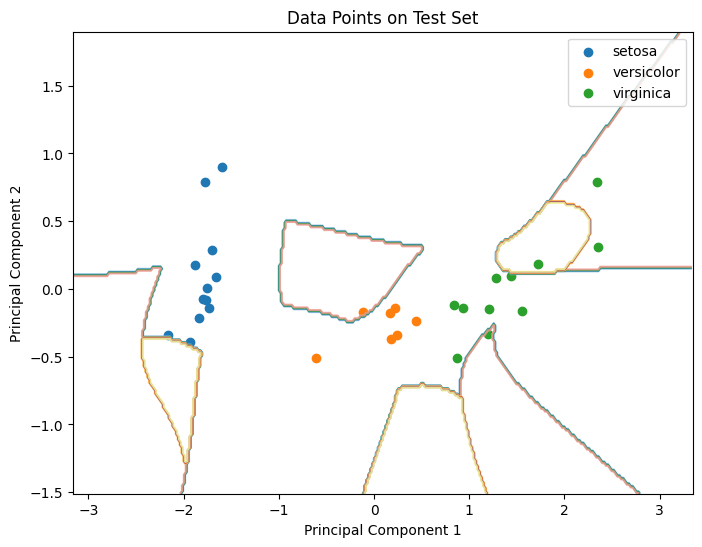

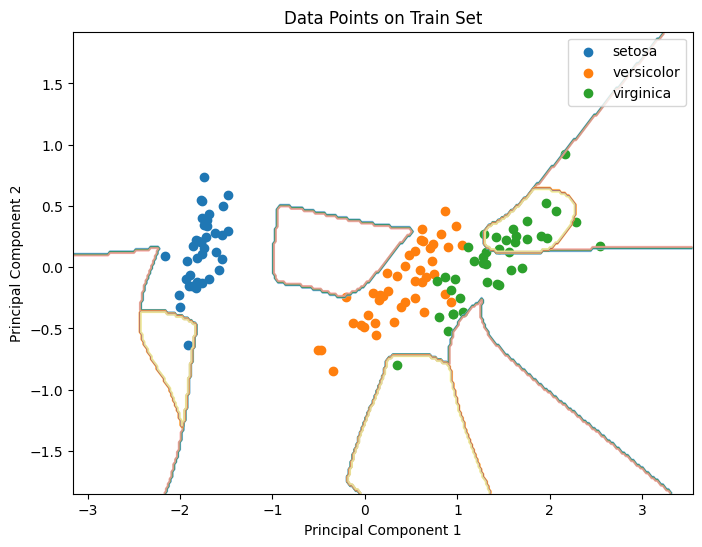

['setosa' 'versicolor' 'virginica']


ModuleNotFoundError: No module named 'evaluate'

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def visualize_multiclass_classification(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,kernel_and_params):
    plt.figure(figsize=(8, 6))
    (_,poly_params, RBF_params, sigmoid_params,C) = kernel_and_params
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':

        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    else:
        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

# Now call visualize_multiclass_classification with the appropriate arguments
iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2



def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack):
    plt.figure(figsize=(8, 6))
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w=w_stack[i]
            bias=b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / w[1]) * x_points - bias / w[1]
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2
if kernel_and_params[0] == 'linear':
    visualize_multiclass_classification1(X_test, y_test,kernel_and_params[0],False, classifiers,iris.target_names[class_0:class_2+2], w_catch, b_catch)
    visualize_multiclass_classification1(X_train, y_train,kernel_and_params[0],True,classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch)
visualize_multiclass_classification(X_test, y_test, kernel_and_params[0], False, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)
visualize_multiclass_classification(X_train, y_train, kernel_and_params[0], True, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)


print(iris.target_names[class_0:class_2+2])


from evaluate import calculate_metrics_and_plot
# Evaluate the model on the training set
if __name__ == "__main__":
    y_true = y_test
    y_pred = pred
    calculate_metrics_and_plot(y_true, y_pred, labels=[0, 1, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

#*****here is the callable function *****--------------------------------------------------------------

model=multiclass_svm(x_train,x_test, y_train, 10,'polynomial', poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)) #just change linear to polynomial to see what happens!! :)
pred, kernel_and_params,w_catch, b_catch, classifiers=model


#*****here is the callable function *****--------------------------------------------------------------

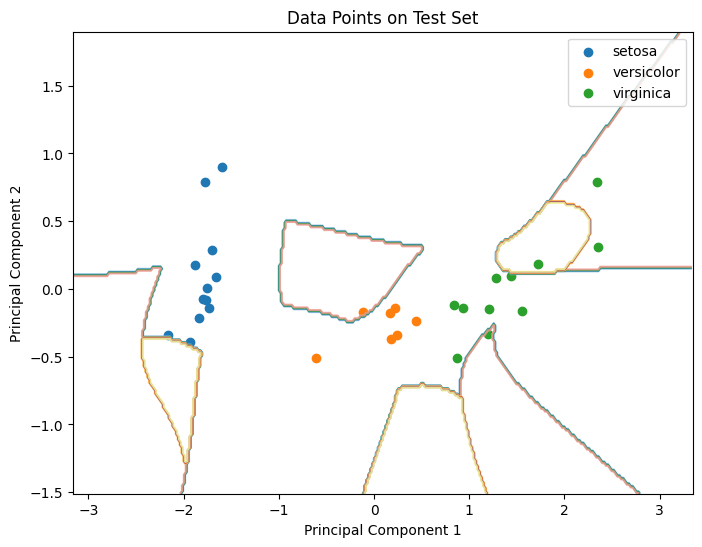

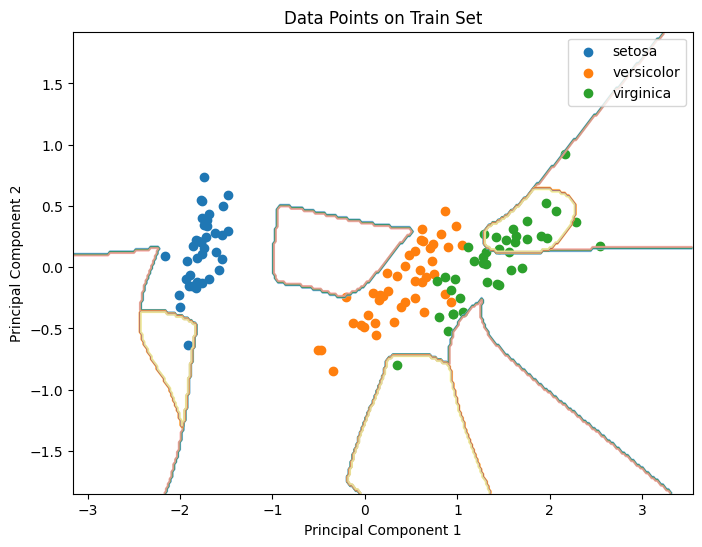

['setosa' 'versicolor' 'virginica']


ModuleNotFoundError: No module named 'evaluate'

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def visualize_multiclass_classification(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,kernel_and_params):
    plt.figure(figsize=(8, 6))
    (_,poly_params, RBF_params, sigmoid_params,C) = kernel_and_params
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':

        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    else:
        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

# Now call visualize_multiclass_classification with the appropriate arguments
iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2



def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack):
    plt.figure(figsize=(8, 6))
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w=w_stack[i]
            bias=b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / w[1]) * x_points - bias / w[1]
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2
if kernel_and_params[0] == 'linear':
    visualize_multiclass_classification1(X_test, y_test,kernel_and_params[0],False, classifiers,iris.target_names[class_0:class_2+2], w_catch, b_catch)
    visualize_multiclass_classification1(X_train, y_train,kernel_and_params[0],True,classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch)
visualize_multiclass_classification(X_test, y_test, kernel_and_params[0], False, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)
visualize_multiclass_classification(X_train, y_train, kernel_and_params[0], True, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)


print(iris.target_names[class_0:class_2+2])


from evaluate import calculate_metrics_and_plot
# Evaluate the model on the training set
if __name__ == "__main__":
    y_true = y_test
    y_pred = pred
    calculate_metrics_and_plot(y_true, y_pred, labels=[0, 1, 2])

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load the Iris dataset
iris = load_iris()

# Select only two classes (classes 1 and 2) and encode labels
Xtrain1 = iris.data
Ttrain = iris.target
pca = PCA(n_components=2)
Xtrain = pca.fit_transform(Xtrain1)
#Ttrain=1.0*(Ttrain == 1) -1.0* (Ttrain == 2)
# Standardize the features
Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(Ttrain))
x = Xtrain[indices]
y1 = Ttrain[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)



def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

        # Support vectors have non zero lagrange multipliers
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    # Create the decision boundary for the plots. Calculates the hypothesis.
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X,X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):

    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch={} #catching w, b only for plot part
    b_catch={}
    a_catch={}
    sv_x_catch={}
    sv_y_catch={}
    # Step 3: Train binary SVM models for each required class combination
    for i,class_label in enumerate(class_labels):
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _,a, sv_x, sv_y,prediction, kernel_and_params=SVM1(X,X_t, binary_y, C,kernel_type,poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction
        w_catch[class_label]=w
        b_catch[class_label]=bias
        a_catch[class_label]=a
        sv_x_catch[class_label]=sv_x
        sv_y_catch[class_label]=sv_y
    '''
    a=np.hstack((classifiers[0],classifiers[1],classifiers[2]))
    np.save('array_file', a)
    '''



    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1),kernel_and_params,w_catch, b_catch,classifiers
    return decision_function(X_t)






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

#*****here is the callable function *****--------------------------------------------------------------

model=multiclass_svm(x_train,x_test, y_train, 10,'polynomial', poly_params=(1, 10), RBF_params=0.5, sigmoid_params=(1, 0.01)) #just change linear to polynomial to see what happens!! :)
pred, kernel_and_params,w_catch, b_catch, classifiers=model


#*****here is the callable function *****--------------------------------------------------------------

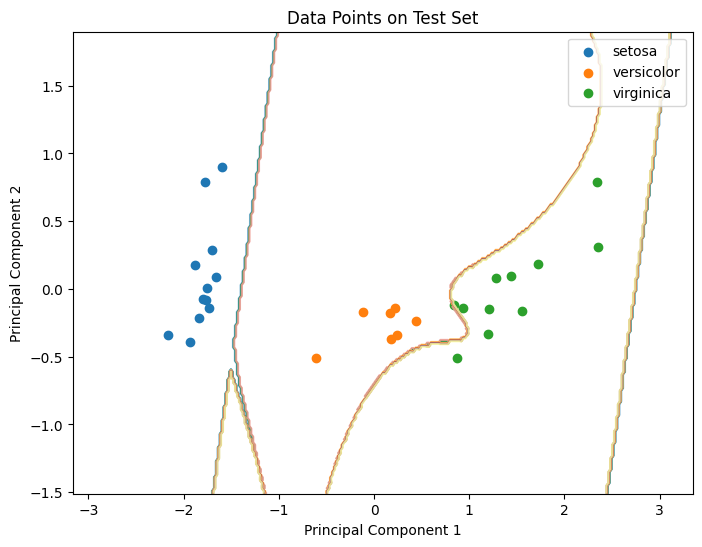

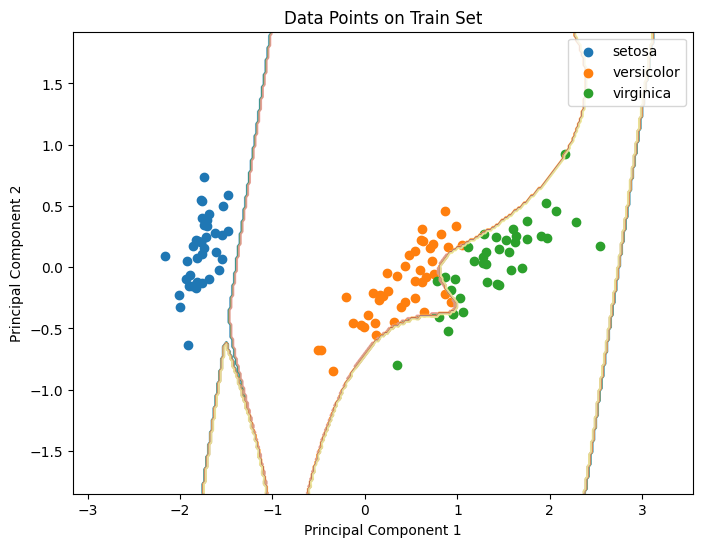

['setosa' 'versicolor' 'virginica']


In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def visualize_multiclass_classification(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,kernel_and_params):
    plt.figure(figsize=(8, 6))
    (_,poly_params, RBF_params, sigmoid_params,C) = kernel_and_params
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':

        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    else:
        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

# Now call visualize_multiclass_classification with the appropriate arguments
iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2



def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack):
    plt.figure(figsize=(8, 6))
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w=w_stack[i]
            bias=b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / w[1]) * x_points - bias / w[1]
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2
if kernel_and_params[0] == 'linear':
    visualize_multiclass_classification1(X_test, y_test,kernel_and_params[0],False, classifiers,iris.target_names[class_0:class_2+2], w_catch, b_catch)
    visualize_multiclass_classification1(X_train, y_train,kernel_and_params[0],True,classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch)
visualize_multiclass_classification(X_test, y_test, kernel_and_params[0], False, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)
visualize_multiclass_classification(X_train, y_train, kernel_and_params[0], True, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)


print(iris.target_names[class_0:class_2+2])


# from evaluate import calculate_metrics_and_plot
# # Evaluate the model on the training set
# if __name__ == "__main__":
#     y_true = y_test
#     y_pred = pred
#     calculate_metrics_and_plot(y_true, y_pred, labels=[0, 1, 2])

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def calculate_metrics_and_plot(y_true, y_pred, labels):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', labels=labels)
    recall = recall_score(y_true, y_pred, average='weighted', labels=labels)
    f1 = f1_score(y_true, y_pred, average='weighted', labels=labels)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


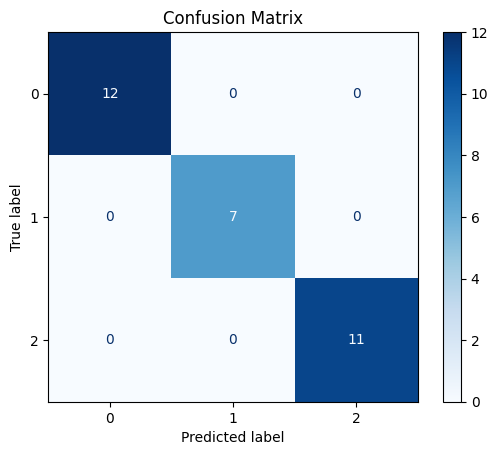

In [ ]:

# Example usage
if __name__ == "__main__":
    # Dummy true and predicted labels
    y_true = y_test
    y_pred = pred
    labels = [0, 1, 2]

    calculate_metrics_and_plot(y_true, y_pred, labels)

In [ ]:
!pip install imageio


In [ ]:
!pip install pillow imageio


In [ ]:
import imageio
from PIL import Image
import os
import numpy as np

# Directory where images are stored
image_directory = '/content/Untitled Folder'

# List files in the directory
files_in_directory = os.listdir(image_directory)
print("Files in directory:", files_in_directory)

# Get list of all image files in the directory
image_files = [os.path.join(image_directory, file) for file in files_in_directory if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Debug: Print the list of image files
print("Image files found:", image_files)

# Check if there are any images
if not image_files:
    raise ValueError("No images found in the directory.")

# Sort the images by name (optional, depends on how you want to order them in the GIF)
image_files.sort()

# Read images, resize them, and store in a list
images = []
target_size = (500, 500)  # You can change this to the desired size

for file in image_files:
    try:
        img = Image.open(file)
        img_resized = img.resize(target_size, Image.ANTIALIAS)
        images.append(np.array(img_resized))  # Convert PIL.Image.Image to numpy array
    except Exception as e:
        print(f"Error reading or processing {file}: {e}")

# Debug: Check if images list is populated
if not images:
    raise ValueError("No images were successfully read.")

# Create and save GIF
gif_path = '/content/output.gif'
imageio.mimsave(gif_path, images, duration=0.5)  # duration is the time between frames in seconds

print(f"GIF saved at {gif_path}")


Files in directory: ['5.JPG', '3.JPG', '0.JPG', '2.JPG', '8.JPG', '6.JPG', '4.JPG', '1.JPG', '9.JPG', '7.JPG']
Image files found: ['/content/Untitled Folder/5.JPG', '/content/Untitled Folder/3.JPG', '/content/Untitled Folder/0.JPG', '/content/Untitled Folder/2.JPG', '/content/Untitled Folder/8.JPG', '/content/Untitled Folder/6.JPG', '/content/Untitled Folder/4.JPG', '/content/Untitled Folder/1.JPG', '/content/Untitled Folder/9.JPG', '/content/Untitled Folder/7.JPG']


<ipython-input-96-b652646d0fcd>:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(target_size, Image.ANTIALIAS)


GIF saved at /content/output.gif


# Problem 3

##Part a


In [ ]:
# در گزارش کار بصورت توضیحی آورده شده است

## Part b

In [ ]:
# در گزارش کار بصورت توضیحی آورده شده است

## Part c

In [ ]:
!gdown 1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8

Downloading...
From (original): https://drive.google.com/uc?id=1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8
From (redirected): https://drive.google.com/uc?id=1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8&confirm=t&uuid=7e1e12b9-e343-4d21-8e5c-630048094482
To: /content/creditcard.csv
100% 151M/151M [00:06<00:00, 22.4MB/s]


In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

NameError: name 'torch' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
file_path = "/content/creditcard.csv"
dataset = pd.read_csv(file_path)
dataset.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print("Few Entries: ")
print(dataset.head())
print("Dataset Shape: ", dataset.shape)
print("Maximum Transaction Value: ", np.max(dataset.Amount))
print("Minimum Transaction Value: ", np.min(dataset.Amount))

Few Entries: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

In [ ]:
feature = dataset.drop(["Time", "Class"], axis=1)
feature.shape

(284807, 29)

In [ ]:
target = dataset['Class']
target.shape

(284807,)

In [ ]:
X = feature
y = target

In [ ]:
# Normalize the 'Amount' column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

NameError: name 'StandardScaler' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
# Denoising Autoencoder
input_dim = X.shape[1]
encoding_dim = 10  # The bottleneck layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(22, activation='relu')(input_layer)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(22, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_noisy, X_resampled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

In [ ]:
# Dense Autoencoder model
class Dense_Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = X.shape[1]
        encoding_dim = 10  # The bottleneck layer
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
# Dense Autoencoder model
class Dense_Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
!git clone https://github.com/ImanGandomi/Autoencoder-and-Oversampling-for-credit-card-fraud-detection-on-highly-imbalanced-dataset.git

Cloning into 'Autoencoder-and-Oversampling-for-credit-card-fraud-detection-on-highly-imbalanced-dataset'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 39 (delta 0), reused 2 (delta 0), pack-reused 35
Receiving objects: 100% (39/39), 127.58 KiB | 698.00 KiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
%cd /content/Autoencoder-and-Oversampling-for-credit-card-fraud-detection-on-highly-imbalanced-dataset

/content/Autoencoder-and-Oversampling-for-credit-card-fraud-detection-on-highly-imbalanced-dataset


In [ ]:
!gdown 1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8

Downloading...
From (original): https://drive.google.com/uc?id=1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8
From (redirected): https://drive.google.com/uc?id=1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8&confirm=t&uuid=ec024381-1c7e-4bd6-975e-2741c6fe0d04
To: /content/Autoencoder-and-Oversampling-for-credit-card-fraud-detection-on-highly-imbalanced-dataset/creditcard.csv
100% 151M/151M [00:04<00:00, 33.5MB/s]


In [ ]:
!python TrainEvaluateModel.py

2024-06-22 14:32:59.949021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 14:32:59.949077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 14:32:59.950416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-22 14:33:01.366109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/Autoencoder-and-Oversampling-for-credit-card-fraud-detection-on-highly-imbalanced-dataset/TrainEvaluateModel.py", line 85, in <module>
    model = TrainEvaluateModel()
  File "/content/Auto

## Prat c

In [352]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [353]:
!gdown 1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8

Downloading...
From (original): https://drive.google.com/uc?id=1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8
From (redirected): https://drive.google.com/uc?id=1kZz6EEvgGF_rmgWe1KCVIbAehjp029O8&confirm=t&uuid=7fd86a1d-46d9-40a1-9ad4-e79feac8d82a
To: /content/creditcard.csv
100% 151M/151M [00:00<00:00, 222MB/s]


In [354]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [355]:
file_path = "/content/creditcard.csv"
data = pd.read_csv(file_path)

In [356]:
X = data.drop(columns=["Time", "Class"]).values
y = data['Class'].values

In [357]:
scaler = StandardScaler()
X[:, -1] = scaler.fit_transform(X[:, -1].reshape(-1, 1)).flatten()

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [359]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=4)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [360]:
# Add Gaussian noise to the training data
noise_factor = 0.5
X_noisy = X_resampled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_resampled.shape)

In [361]:
# Convert to PyTorch tensors
X_noisy_tensor = torch.tensor(X_noisy, dtype=torch.float32).to(device)
X_resampled_tensor = torch.tensor(X_resampled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_resampled_tensor = torch.tensor(y_resampled, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

In [362]:
# Create DataLoader
batch_size = 512
train_dataset = TensorDataset(X_noisy_tensor, X_resampled_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [363]:
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [313]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(29, 22),
            nn.LeakyReLU(),
            nn.Linear(22, 15),
            nn.LeakyReLU(),
            nn.Linear(15, 10),
            nn.LeakyReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 15),
            nn.LeakyReLU(),
            nn.Linear(15, 22),
            nn.LeakyReLU(),
            nn.Linear(22, 29),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [314]:
# Define Classifier
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(29, 22),
            nn.LeakyReLU(),
            nn.Linear(22, 15),
            nn.LeakyReLU(),
            nn.Linear(15, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.classifier(x)

In [364]:
# Instantiate models
autoencoder = DenoisingAutoencoder().to(device)
classifier = Classifier().to(device)

In [365]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

In [136]:
autoencoder_loss = []


# Train Autoencoder
num_epochs1 = 30
for epoch in range(num_epochs1):
    autoencoder.train()
    for batch in train_loader:
        X_noisy_batch, X_resampled_batch = batch
        optimizer.zero_grad()
        outputs = autoencoder(X_noisy_batch)
        loss = criterion(outputs, X_resampled_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs1}], Loss: {loss.item():.4f}')

Epoch [1/30], Loss: 0.4310
Epoch [2/30], Loss: 0.3558
Epoch [3/30], Loss: 0.2850
Epoch [4/30], Loss: 0.2769
Epoch [5/30], Loss: 0.2600
Epoch [6/30], Loss: 0.2263
Epoch [7/30], Loss: 0.2568
Epoch [8/30], Loss: 0.2497
Epoch [9/30], Loss: 0.2547
Epoch [10/30], Loss: 0.2140
Epoch [11/30], Loss: 0.2158
Epoch [12/30], Loss: 0.2235
Epoch [13/30], Loss: 0.2426
Epoch [14/30], Loss: 0.2212
Epoch [15/30], Loss: 0.2504
Epoch [16/30], Loss: 0.2313
Epoch [17/30], Loss: 0.2145
Epoch [18/30], Loss: 0.2242
Epoch [19/30], Loss: 0.2168
Epoch [20/30], Loss: 0.2258
Epoch [21/30], Loss: 0.2172
Epoch [22/30], Loss: 0.2633
Epoch [23/30], Loss: 0.2238
Epoch [24/30], Loss: 0.2165
Epoch [25/30], Loss: 0.2043
Epoch [26/30], Loss: 0.2061
Epoch [27/30], Loss: 0.2082
Epoch [28/30], Loss: 0.2100
Epoch [29/30], Loss: 0.2108
Epoch [30/30], Loss: 0.1954


In [366]:
# Extract denoised features using the trained autoencoder
autoencoder.eval()
with torch.no_grad():
    X_train_denoised = autoencoder(X_resampled_tensor).cpu().numpy()
    X_test_denoised = autoencoder(X_test_tensor).cpu().numpy()


In [383]:
# Convert denoised features to tensors
X_train_denoised_tensor = torch.tensor(X_train_denoised, dtype=torch.float32).to(device)
X_test_denoised_tensor = torch.tensor(X_test_denoised, dtype=torch.float32).to(device)

In [368]:
# Create DataLoader for denoised data
denoised_train_dataset = TensorDataset(X_train_denoised_tensor, y_resampled_tensor)
denoised_train_loader = DataLoader(denoised_train_dataset, batch_size=batch_size, shuffle=True)

In [320]:
# Define loss function and optimizer for the classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.01)

In [321]:
# Track best loss for saving model
best_loss = float('inf')
best_model_path = 'best_classifier_model.pth'

In [322]:
# For plotting accuracy and recall
train_accuracies = []
train_recalls = []
test_accuracies = []
test_recalls = []

In [323]:
outputs

tensor([[0.3464, 0.6536],
        [0.3460, 0.6540],
        [0.3461, 0.6539],
        ...,
        [0.3445, 0.6555],
        [0.3472, 0.6528],
        [0.3454, 0.6546]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [324]:
y_batch

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [326]:
outputs[0].dtype

torch.float32

In [325]:
num_epochs = 60

# Train Classifier
for epoch in range(num_epochs):
    classifier.train()
    running_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    for batch in denoised_train_loader:
        X_denoised_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = classifier(X_denoised_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

    train_accuracy = 100 * correct / total
    train_recall = recall_score(y_true, y_pred)
    train_accuracies.append(train_accuracy)
    train_recalls.append(train_recall)
    avg_loss = running_loss / len(denoised_train_loader)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%, Recall: {train_recall:.2f}')

    # Save the best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(classifier.state_dict(), best_model_path)

    # Evaluate on test data
    classifier.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = classifier(autoencoder(X_batch))
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    test_recall = recall_score(y_true, y_pred)
    test_accuracies.append(test_accuracy)
    test_recalls.append(test_recall)
    print(f'Test Accuracy: {test_accuracy:.2f}%, Test Recall: {test_recall:.2f}')


Epoch [1/60], Loss: 0.4104, Accuracy: 90.44%, Recall: 0.87
Test Accuracy: 93.20%, Test Recall: 0.92
Epoch [2/60], Loss: 0.3986, Accuracy: 91.35%, Recall: 0.87
Test Accuracy: 96.19%, Test Recall: 0.92


KeyboardInterrupt: 

In [ ]:
num_epochs = 60

# Train Classifier
for epoch in range(num_epochs):
    classifier.train()
    running_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    for batch in denoised_train_loader:
        X_denoised_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = classifier(X_denoised_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

    train_accuracy = 100 * correct / total
    train_recall = recall_score(y_true, y_pred)
    train_accuracies.append(train_accuracy)
    train_recalls.append(train_recall)
    avg_loss = running_loss / len(denoised_train_loader)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%, Recall: {train_recall:.2f}')

    # Save the best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(classifier.state_dict(), best_model_path)

    # Evaluate on test data
    classifier.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = classifier(autoencoder.encoder(X_batch))
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    test_recall = recall_score(y_true, y_pred)
    test_accuracies.append(test_accuracy)
    test_recalls.append(test_recall)
    print(f'Test Accuracy: {test_accuracy:.2f}%, Test Recall: {test_recall:.2f}')


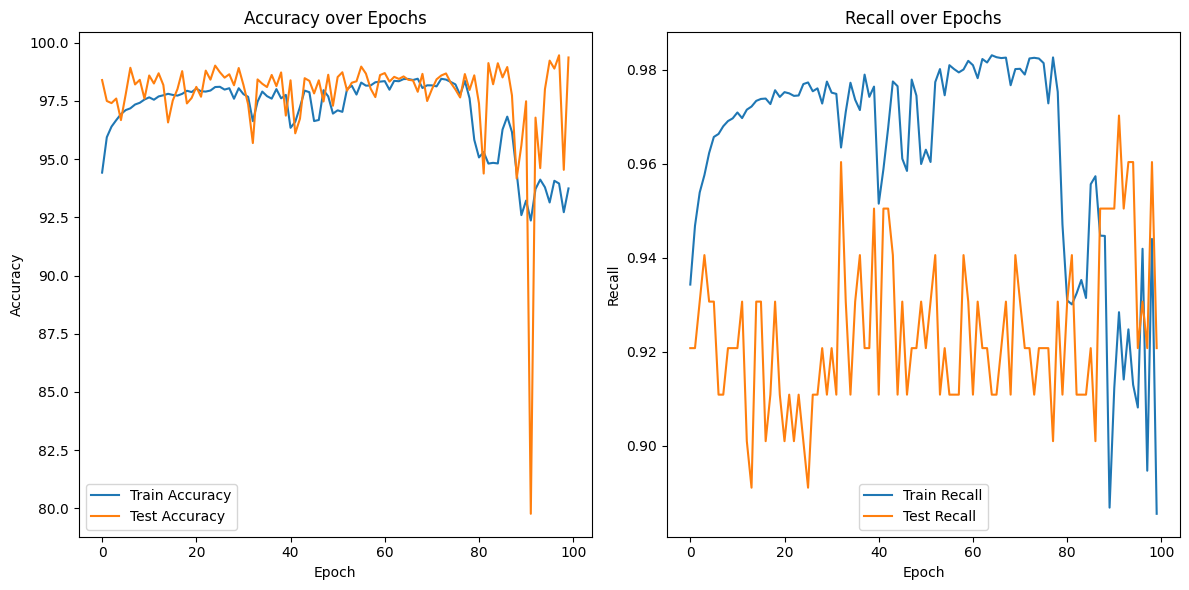

In [25]:
# Plot Accuracy and Recall
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(train_recalls, label='Train Recall')
plt.plot(test_recalls, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall over Epochs')

plt.tight_layout()
plt.show()

## Part d

Accuracy: 0.9754
Precision: 0.0625
Recall: 0.9208
F1 Score: 0.1171


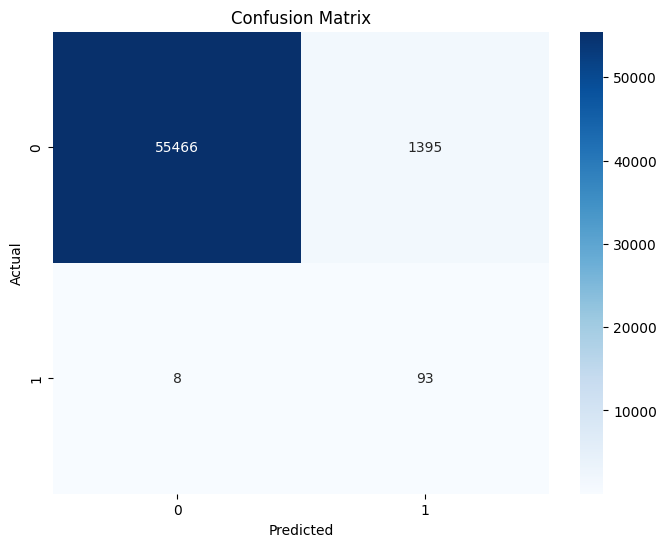

In [93]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix


In [28]:
# Calculate and print the classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.21      0.92      0.34       101

    accuracy                           0.99     56962
   macro avg       0.60      0.96      0.67     56962
weighted avg       1.00      0.99      1.00     56962



##Part e

In [227]:
def calculate_metrics(outputs , labels, thresholds):
    recalls = []
    accuracies = []
    for threshold in thresholds:
        predictions = (outputs > threshold).astype(int)
        recall = recall_score(labels, predictions)
        accuracy = accuracy_score(labels, predictions)
        recalls.append(recall)
        accuracies.append(accuracy)

    return recalls , accuracies


In [228]:
thresholds = np.linspace(0, 1, 10)

In [229]:
test_recalls, test_accuracies = calculate_metrics(y_pred, y_true, thresholds)

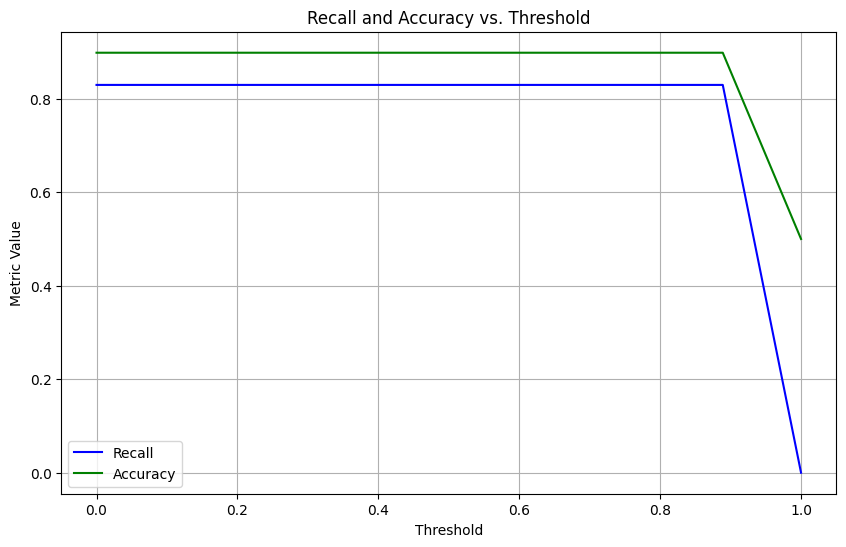

In [230]:
# Plotting the recall and accuracy for different thresholds on the same figure
plt.figure(figsize=(10, 6))

# Plot Recall
plt.plot(thresholds, test_recalls, label='Recall', color='blue')

# Plot Accuracy
plt.plot(thresholds, test_accuracies, label='Accuracy', color='green')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Recall and Accuracy vs. Threshold')
plt.legend()
plt.grid(True)

plt.show()


## Part f

In [384]:
# Define Classifier
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(29, 22),
            nn.ReLU(),
            nn.Linear(22, 15),
            nn.ReLU(),
            nn.Linear(15, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.classifier(x)

In [385]:
# Instantiate models
classifier = Classifier().to(device)

In [386]:
X = data.drop(columns=["Time", "Class"]).values
y = data['Class'].values

In [387]:
scaler = StandardScaler()
X[:, -1] = scaler.fit_transform(X[:, -1].reshape(-1, 1)).flatten()

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [389]:
# Convert denoised features to tensors
X_train_denoised_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_denoised_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

In [390]:
y_resampled_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

In [391]:
X_train_denoised_tensor.dtype

torch.float32

In [392]:
# Create DataLoader for denoised data
denoised_train_dataset = TensorDataset(X_train_denoised_tensor, y_resampled_tensor)
denoised_train_loader = DataLoader(denoised_train_dataset, batch_size=batch_size, shuffle=True)

In [393]:
# Define loss function and optimizer for the classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.01)

In [394]:
num_epochs = 60

# Train Classifier
for epoch in range(num_epochs):
    classifier.train()
    running_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    for batch in denoised_train_loader:
        X_denoised_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = classifier(X_denoised_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

    train_accuracy = 100 * correct / total
    train_recall = recall_score(y_true, y_pred)
    train_accuracies.append(train_accuracy)
    train_recalls.append(train_recall)
    avg_loss = running_loss / len(denoised_train_loader)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%, Recall: {train_recall:.2f}')

    # Save the best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(classifier.state_dict(), best_model_path)

    # Evaluate on test data
    classifier.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = classifier(autoencoder.encoder(X_batch))
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    test_recall = recall_score(y_true, y_pred)
    test_accuracies.append(test_accuracy)
    test_recalls.append(test_recall)
    print(f'Test Accuracy: {test_accuracy:.2f}%, Test Recall: {test_recall:.2f}')


RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'